# Magnetic Reconnection Lectures Monday 03/31/25 and Wednesday 04/02/25
---

**Goals:**


1.   Reproduce the conservation arguments of the Sweet-Parker theory from direct numerical simulations of nonlinear plasma fluid equations. 
2.   Examine what is meant by the concept of "fast" magnetic reconnection in comparison to the original Sweet-Parker theory.
3.   Determine what causes the reconnection to be "fast" by an Ohm's Law analysis of our nonlinear simulations. 

---

### Part 1: Some preliminaries

To begin, let us review the equations we will numerically integrate to model magnetic reconnection. We anticipate needing physics "beyond MHD" due to the arguments laid out in last week's class on the Sweet-Parker theory: while resistivity is sufficient non-ideal physics to break field lines, the scaling of the inflow velocity, and thus the rate of magnetic reconnection, is still too slow to explain observations of magnetic reconnection in laboratory, space, and astrophysical plasmas. 

We first consider the Vlasov-Maxwell system of equations
\begin{align}
  & \frac{\partial f_s}{\partial t} + \nabla \cdot \left (\mathbf{v} f_s \right ) + \nabla_{\mathbf{v}} \cdot \left ( \frac{q_s}{m_s} \left [\mathbf{E} + \mathbf{v} \times \mathbf{B} \right] f_s \right ) = C[f_s] \\
  & \epsilon_0 \mu_0 \frac{\partial \mathbf{E}}{\partial t} - \nabla \times \mathbf{B} = \mu_0 \mathbf{J}, \qquad \mathbf{J} = \sum_s q_s \int \mathbf{v} f_s \thinspace d\mathbf{v} \\
  & \nabla \cdot \mathbf{E} = \frac{\rho_c}{\epsilon_0}, \qquad \rho_c = \sum_s q_s \int f_s \thinspace d\mathbf{v} \\
  & \frac{\partial \mathbf{B}}{\partial t} + \nabla \times \mathbf{E} = 0, \qquad \nabla \cdot \mathbf{B} = 0  
\end{align}

To derive fluid equations from the Vlasov-Maxwell system, we take (mass-weighted) velocity moments of the evolution equation for the distribution function. The simplest sets of fluid equations utilize the zeroth, first, and either scalar second or tensor second moment of the equation. The zeroth moment gives the familiar conservation of mass equation: 
\begin{align}
  \frac{\partial \rho_s}{\partial t} + \nabla \cdot \left ( \rho_s \mathbf{u}_s \right ) = 0 
\end{align}
The first moment gives the familiar conservation of momentum equation 
\begin{align}
  \frac{\partial \rho_s \mathbf{u}_s}{\partial t} + \nabla \cdot \left ( \rho_s \mathbf{u}_s \mathbf{u}_s + \mathbf{P}_s \right ) = \frac{q_s}{m_s} \left ( \rho_s \mathbf{E} + \rho_s \mathbf{u}_s \times \mathbf{B} \right ) + \mathbf{R}
\end{align}
where $\mathbf{P}_s$ is the pressure tensor of species $s$ and $\mathbf{R}$ is an as-yet-unspecified inter-species friction term. For at least one system of equations we will solve today, we will take the inter-species friction to be (for an electron-singly ionized ion plasma):
\begin{align}
  \mathbf{R}_{ei} & = \frac{\rho_e}{\tau_{ei}} \left (\mathbf{u}_e - \mathbf{u}_i \right ),  \\
  \tau_{ei} & = \frac{6 \sqrt{2} \pi^{\frac{3}{2}} \epsilon_0^2 m_i \sqrt{m_e} T_e^{\frac{3}{2}}}{\ln \Lambda e^4 \rho_i}. 
\end{align}
If we assume $n_i \approx n_e$, we can see how we can rearrange this inter-species friction term into a more familiar form
\begin{align}
  \mathbf{R}_{ei} & = \frac{\ln \Lambda e^3 \sqrt{m_e} n}{6 \sqrt{2} \pi^{\frac{3}{2}} \epsilon_0^2 T_e^{\frac{3}{2}}} \left (en\mathbf{u}_e - en\mathbf{u}_i \right ) \\
  & =  \frac{\ln \Lambda}{6 \sqrt{2} \pi^{\frac{3}{2}}} \frac{\omega_{pe}}{e n \lambda_{De}^3} \left (en\mathbf{u}_e - en\mathbf{u}_i \right ) \\
  & = -\eta \mathbf{J}
\end{align}
**We will not assume $n_i \approx n_e$ going forward; we have just chosen to illustrate that this form of inter-species friction is a generalization of the resistivity you have been working with up until this point, where now the current density is given by the difference in flows between the electrons and singly-charged ions**

Now we consider the tensor second moment of the Vlasov equation, switching to Einstein summation notation for clarity on the coupling to the rank-3 heat-flux tensor and neglecting the contribution from the collision operator: 
\begin{align}
\frac{\partial \mathcal{P}_{ij_s}}{\partial t} + \frac{\partial \mathcal{Q}_{ijk_s}}{\partial x_k} = \frac{q_s}{m_s} \rho_s u_{s[i} E_{j]} + \frac{q_s}{m_s} \epsilon_{[ikl} \mathcal{P}_{kj_s]} B_l
\end{align}
where the square brackets around indices represent the minimal sum over permutations of free indices needed to yield completely symmetric tensors. So for example, $u_{s[i} E_{j]} = u_{i_s} E_j + u_{j_s} E_i$. This tensor second moment $\mathcal{P}_{ij_s} = P_{ij_s} + \rho_s u_{i_s} u_{j_s} = \mathbf{P}_s + \rho_s \mathbf{u}_s \mathbf{u}_s$ is often referred to as the stress tensor and includes both the pressure tensor and Reynolds stress. The rank-3 heat-flux tensor can be written in general as
\begin{align}
  \mathcal{Q}_{ijk_s} = Q_{ijk_s} + u_{s[i} \mathcal{P}_{jk_s]} - 2 \rho_s u_{i_s} u_{j_s} u_{k_s}
\end{align}
where
\begin{align}
  Q_{ijk_s} = \int (v_i - u_{i_s}) (v_j - u_{j_s}) (v_k - u_{k_s}) f_s \thinspace d\mathbf{v}
\end{align}
is the plasma rest-frame heat flux. We now see what is commonly referred to as the "closure" problem as we have 10 equations, 1 from the mass density evolution, 3 from the momentum density evolution, and 6 from the stress tensor evolution, but 20 unknowns thanks to the 10 unknown components for the plasma rest-frame heat flux. To close the system, we must express the plasma rest-frame heat flux in terms of lower moments. A straightforward equation we will use expresses 
\begin{align}
  \frac{\partial Q_{ijk_s}}{\partial x_k} & = v_{th_s} k_0 \left (P_{ij_s} - p_s \right ) \\ 
  p_s & = \frac{1}{3} P_{ii}, \qquad v_{th_s} = \sqrt{\frac{p_s}{\rho_s}}.
\end{align}
In other words, the plasma rest-frame heat flux works to relax the pressure tensor back to isotropy and a scalar pressure at a specified length scale $k_0$. 

Based on the form of the tensor second moment equation, or directly from the Vlasov equation **neglecting collisions**, what is the scalar second moment equation for the evolution of the total particle energy?
1.   $\frac{\partial \mathcal{E}_s}{\partial t} + \nabla \cdot \left ( \left [\mathcal{E}_s + p_s\right ] \mathbf{u}_s + \mathbf{q}_s \right ) = \frac{q_s}{m_s} \rho_s \mathbf{u}_s \cdot \mathbf{E} $
2.   $\frac{\partial \mathcal{E}_s}{\partial t} + \nabla \cdot \left ( \left [\mathcal{E}_s + p_s\right ] \mathbf{u}_s + \mathbf{q}_s \right ) = \frac{q_s}{m_s} \left (\rho_s \mathbf{u}_s \cdot \mathbf{E} + \rho_s |\mathbf{u}_s \times \mathbf{B}|^2 \right )$
3.   $\frac{\partial \mathcal{E}_s}{\partial t} + \nabla \cdot \left ( \left [\mathcal{E}_s + p_s\right ] \mathbf{u}_s + \mathbf{q}_s \right ) = 0$
4.   $\frac{\partial \mathcal{E}_s}{\partial t} + \nabla \cdot \left ( \left [\mathcal{E}_s + p_s\right ] \mathbf{u}_s + \mathbf{q}_s \right ) = \mathbf{J}  \cdot \left(\mathbf{u}_s \times \mathbf{B}\right ) $

[Answer Form 1.](https://docs.google.com/forms/d/e/1FAIpQLSetFle7blYJSFAuEqt2WItk0KZ_q5v9q1-OPfkOrbYYLTDKCA/viewform?usp=dialog)

To close the fluid equations at this conservation of energy equation, assuming an ideal fluid, we can set $\mathbf{q}_s = 0$ and obtain the scalar pressure via the equation of state, $\mathcal{E}_s = \frac{p_s}{\Gamma - 1} + \frac{1}{2} \rho_s |\mathbf{u}_s|^2$, where $\Gamma$ is the adiabatic index of the fluid. 

### Some terminology and helper functions

The coupled set of fluid equations: either the 5 equations from our velocity moments through a scalar second moment, or the 10 equations through the tensor second velocity moment, **we refer to as the 5m and 10m, or 5 moment and 10 moment, multi-fluid equations.** We can solve these equations for any number of species (even mixing some fluids being 5 moment while other fluids are 10 moment) and couple to Maxwell's equations via the current density, which is simply a sum over species of the charge to mass ratio multiplied by the momentum density. 

We can now proceed with the necessary preliminaries, including importing our needed Python libraries such as matplotlib and numpy, and defining some helper functions which will be useful for visualizing and analyzing the data. 

#### ​Initialize, Authenticate, and Configure Remote Execution Environment

##### Start a Cybershuttle Remote Executor: This will submit a remote job to Anvil
- **Cluster** - Anvil & Jetstream
- **Community Allocation** - Gkeyll
- **Requested Resources** 
    - Anvil:4 CPUs, 4GB Memory, 60 Minutes, Shared Queue
    - Jetstream:1 CPUs, 60 Minutes, Cloud Queue


In [1]:
%pip install -qU "airavata-python-sdk[notebook]"
import airavata_jupyter_magic

%authenticate

# PLEASE NOTE: At a given time, ONLY run a single job in one of the available clusters: Anvil OR Jetstream. 
# Anvil is the default cluster and if you need to run on Jetstream; comment the Anvil and uncomment the Jetstream
# Anvil
%request_runtime test_cpu --file=cybershuttle.yml --group=Gkeyll --walltime=60 --use=AnvilCPU:shared
# Jetstream
# %request_runtime test_cpu --file=cybershuttle.yml --group=Gkeyll --walltime=60 --use=Gkeyll:cloud

%wait_for_runtime test_cpu --live
%switch_runtime test_cpu

Note: you may need to restart the kernel to use updated packages.

Loaded airavata_jupyter_magic (2.1.4.post4) 
(current runtime = local)

  %authenticate                              -- Authenticate to access high-performance runtimes.
  %request_runtime <rt> [args]               -- Request a runtime named <rt> with configuration <args>.
                                                Call multiple times to request multiple runtimes.
  %restart_runtime <rt>                      -- Restart runtime <rt> if it hangs. This will clear all variables.
  %stop_runtime <rt>                         -- Stop runtime <rt> when no longer needed.
  %wait_for_runtime <rt>                     -- Wait for runtime <rt> to be ready.
  %switch_runtime <rt>                       -- Switch the active runtime to <rt>. All subsequent cells will run here.
  %%run_on <rt>                              -- Force a cell to always execute on <rt>, regardless of the active runtime.
  %stat_runtime <rt>               

Output()

Authenticated.

Requesting runtime=test_cpu...
[AnvilCPU:shared, 60 Minutes, 1 Node(s), 4 CPU(s), 1 GPU(s), 4096 MB RAM, 1024 MB VRAM]
* modules=[]
* libraries=['python=3.11', 'pip']
* pip=['postgkyl']
* mounts=[]
Requested runtime=test_cpu
Request successful: runtime=test_cpu


Output()

local:/tmp/connection__4e0ptku.json --> test_cpu:connection__4e0ptku.json... [200]
started proc_name=test_cpu_kernel on rt=test_cpu. pid=1343446
forwarding ports=[23715, 23716, 23717, 23718, 23719]
test_cpu:23715 -> access via 18.118.140.230:10000
test_cpu:23716 -> access via 18.118.140.230:10001
test_cpu:23717 -> access via 18.118.140.230:10002
test_cpu:23718 -> access via 18.118.140.230:10003
test_cpu:23719 -> access via 18.118.140.230:10004
started ipykernel tunnels for test_cpu at 18.118.140.230
started ipykernel client for test_cpu
Remote Jupyter kernel launched and connected for runtime=test_cpu.
Switched to runtime=test_cpu.


In [2]:
import os

data_path = os.path.expanduser("~/cybershuttle/dataset/Plasma-Vlab-amitava-class")

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import postgkyl as pg
import numpy as np

#Note: This cell may execute longer if the job is not yet active in the remote cluster. Please pause till the status =READY message appears.

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [4]:
# Helper function for computing vector potential
def calc_psi2d(fx, fy, dx=1, dy=1):#solenoidal flows
	'''
	Calcualte psi by integrating dpsi = -fy*dx + fx*dy, psi[0,0]=0.
	Notes: 
		1. (fx=dpsi/dy,fy=-dpsi/dx) is called Hamiltonian gradient of psi, and	contours of psi give vector field (fx, fy);
		2. div(f)=0
	'''
	ny,nx=fx.shape
	psi=np.zeros((ny,nx))
	for jx in range(1,nx):
		psi[0,jx]=psi[0,jx-1]-fy[0,jx]*dx
	for jy in range(1,ny):
		psi[jy,:]=psi[jy-1,:]+fx[jy,:]*dy
	# since f = rot(A) gives extra restraints on f (e.g., div(f)=0)
	# it makes sense that information provided by fy[1:nx,:] is useless here
	return psi
print(f"{data_path}")

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
/home/x-gcommunityus/cybershuttle/dataset/Plasma-Vlab-amitava-class
cell finished on test_cpu.


### Defining our units

When running simulations, it is often convenient to define a set of normalized units in which to perform the simulation. Many physical constants, such as the permittivity of free space, $\epsilon_0 = 8.85 \times 10^{-12} F/m$, or the actual electron and proton mass, $m_e = 9.11\times 10^{-31} kg, m_p = 1.67\times 10^{-27}kg$ respectively, could lead to enhanced truncation error due to finite precision arithmetic if we carried around the physical values of these constants in our simulations. 

Below I define the units of the electron-ion multi-fluid magnetic reconnection simulations we have performed. 

In [5]:
# Physical constants and derived parameters
gas_gamma = 5.0 / 3.0 # Adiabatic index.
epsilon0 = 1.0 # Permittivity of free space.
mu0 = 1.0 # Permeability of free space.
light_speed = 1.0/np.sqrt(epsilon0*mu0) # Speed of light. 
mass_ion = 100.0 # Ion mass.
charge_ion = 1.0 # Ion charge.
mass_elc = 1.0 # Electron mass.
charge_elc = -1.0 # Electron charge.
Ti_over_Te = 5.0 # Ion temperature / electron temperature.
n0 = 1.0 # Reference number density.
nb_over_n0 = 0.2 # Background number density / reference number density.
wpi = np.sqrt(charge_ion**2 * n0 / (epsilon0 * mass_ion)) # Ion plasma frequency. 
wpe = np.sqrt(charge_ion**2 * n0 / (epsilon0 * mass_elc)) # Electron plasma frequency. 
di = light_speed/wpi # Ion inertial length. 
de = light_speed/wpe # Electron inertial length. 
B0 = 0.5 # Reference magnetic field strength. Sets ratio of vAe/c. 
beta = 1.0 # Plasma beta.
omega_ci = charge_ion * B0 / mass_ion # Ion cyclotron frequency. 
vA0 = B0/np.sqrt(mu0*n0*mass_ion) # Reference Alfven speed. 
vA_up = B0/np.sqrt(mu0*nb_over_n0*mass_ion) # Upstream reference Alfven speed from background density. 
Lambda_ee = 2.0e5 # Plasma parameter for computing collision time. 
Ti_frac = Ti_over_Te / (1.0 + Ti_over_Te) # Fraction of total temperature from ions.
Te_frac = 1.0 / (1.0 + Ti_over_Te) # Fraction of total temperature from electrons.
T_tot = beta * (B0 * B0) / 2.0 / n0 # Total temperature.
T_elc_ref = T_tot*Te_frac # Reference electron temperature. 

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


After examination of these units, my normalized time, length, and velocity scales are?
1.   $t = \omega_{pe}^{-1} \tilde{t} $, $\mathbf{x} = d_e \tilde{\mathbf{x}}$, $\mathbf{v} = c \tilde{\mathbf{v}}$
2.   $t = \omega_{pi}^{-1} \tilde{t} $, $\mathbf{x} = d_i \tilde{\mathbf{x}}$, $\mathbf{v} = c \tilde{\mathbf{v}}$
3.   $t = \omega_{pe}^{-1} \tilde{t} $, $\mathbf{x} = \lambda_{De} \tilde{\mathbf{x}}$, $\mathbf{v} = v_{th_e} \tilde{\mathbf{v}}$
4.   $t = \Omega_{ci}^{-1} \tilde{t} $, $\mathbf{x} = \rho_i \tilde{\mathbf{x}}$, $\mathbf{v} = v_{th_i} \tilde{\mathbf{v}}$

where $\omega_{ps} = \sqrt{e^2 n_s/\epsilon_0 m_s}$ is the plasma frequency of species $s$, $d_s = c/\omega_{ps}$ is the inertial length of species $s$, $\lambda_{De} = v_{th_e}/\omega_{pe}$ is the Debye length, $\Omega_{ci} = e B_0/m_i$ is the ion cyclotron frequency, and $\rho_i = \sqrt{2} v_{th_i}/\Omega_{ci}$ is the ion gyroradius. 

If we include resistivity in our 5 moment calculations, we need to specify the plasma parameter, $\Lambda \sim n \lambda_{De}^3$, to compute the collision time $\tau_{ei}$. In these normalized units, the collision time scales like
1.   $\tau_{ei} \sim \Lambda \tilde{t}$
2.   $\tau_{ei} \sim \ln\Lambda \tilde{t}$
3.   $\tau_{ei} \sim \frac{\Lambda}{\ln\Lambda} \tilde{t}$
4.   $\tau_{ei} \sim \frac{\ln\Lambda}{\Lambda} \tilde{t}$

[Answer Form 2](https://docs.google.com/forms/d/e/1FAIpQLSflCoqOnP96nbp_jnW4KR6HOe6f4atx7sFtP2FUMG782WxErQ/viewform?usp=sharing)

### $\texttt{Gkeyll}$ and $\texttt{postgkyl}$

The code we will be using to model magnetic reconnection is [$\texttt{Gkeyll}$](https://gkeyll.readthedocs.io/), a general purpose simulation framework for a variety of fluid and plasma systems. You can download and install $\texttt{Gkeyll}$ yourself by following the installation instructions on our [Github repo](https://github.com/ammarhakim/gkylzero). 

To read the data, we will utilize the post-processing suite we have developed alongside $\texttt{Gkeyll}$, [$\texttt{postgkyl}$](https://github.com/ammarhakim/postgkyl), which you can also download and install via the instructions on Github. The cluster we will be utilizing for analyzing the results of our simulations already has installations of $\texttt{Gkeyll}$ and $\texttt{postgkyl}$; we already imported postgkyl in this Jupyter Notebook, so if we did not have $\texttt{postgkyl}$, that import command would not have worked! 

The output of $\texttt{Gkeyll}$ simulations can be manipulated in one of two ways: through the GData class, which retains useful metadata from the simulation to subsequent operations, or by directly fetching the raw values and grid and storing them in Numpy arrays for our subsequent manipulations. We will utilize both means of reading the data as we analyze our simulation results. 

In [6]:
def get_Gdata(pre, frame):
    data_elc = pg.data.GData("%s-elc_%d.gkyl" % (pre, frame))
    data_ion = pg.data.GData("%s-ion_%d.gkyl" % (pre, frame))
    data_field = pg.data.GData("%s-field_%d.gkyl" % (pre, frame))

    return data_elc, data_ion, data_field

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [7]:
def read_data(data_elc, data_ion, data_field):
    fluid_elc = data_elc.get_values()
    fluid_ion = data_ion.get_values()  
    field = data_field.get_values()  

    # Same grid for all electrons, ions, and EM fields
    coords = data_elc.get_grid()
    # Center the grid values
    for d in range(len(coords)):
        coords[d] = 0.5*(coords[d][:-1] + coords[d][1:])

    return coords, fluid_elc, fluid_ion, field

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


### A look at the initial conditions

In the beginning of the tearing mode calculation we started last week, we considered an equilibrium magnetic field profile of the form
\begin{align}
\mathbf{B}(x,y) = B_0 \tanh \left ( \frac{y}{\lambda} \right ) \hat{\mathbf{x}} 
\end{align}
Such a magnetic field necessarily has a corresponding current density profile of the form
\begin{align}
  \mathbf{J}(x,y) = -\frac{B_0}{\lambda} \textrm{sech}^2 \left ( \frac{y}{\lambda} \right ) \hat{\mathbf{z}}
\end{align}
Is this a force-free equilibrium? Can we re-write this equilibrium as $\nabla \times \mathbf{B} = \alpha \mathbf{B}$ for some $\alpha$?
1.   Yes
2.   No

If this equilibrium is not force-free, what pressure profile do we need to satisfy force-balance? 
1.   No pressure is needed; this equilibrium is force-free
2.   $p \propto \textrm{sech}^2 \left ( \frac{y}{\lambda} \right )$
3.   $p \propto \tanh \left ( \frac{y}{\lambda} \right ) \textrm{sech}^2 \left ( \frac{y}{\lambda} \right )$
4.   $p \propto \tanh \left ( \frac{y}{\lambda} \right )$

[Answer Form 3](https://docs.google.com/forms/d/e/1FAIpQLScw_ZUM63GHiY4jdReTyHAmrbvGpClxp-R5vn1knsUDhlEZ1w/viewform?usp=dialog)

Let's visualize our equilibrium from our simulations. Since the equilibrium only requires the lowest moments, the equilibrium is identical in both 5-moment and 10-moment. 

In [8]:
data_elc, data_ion, data_field = get_Gdata(f"{data_path}/resistive_gem_mass100/rt_5m_resistive_gem", 0)
r_coords, r_fluid_elc, r_fluid_ion, r_field = read_data(data_elc, data_ion, data_field)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [9]:
# Compute out-of-plane current density
Nx = r_fluid_ion.shape[0]
Ny = r_fluid_ion.shape[1]
Jz = np.zeros((Nx, Ny))
Jz = charge_ion/mass_ion*r_fluid_ion[...,3] + charge_elc/mass_elc*r_fluid_elc[...,3]
# Compute contours of the magnetic field.
Bx = r_field[...,3]
By = r_field[...,4]
dx = r_coords[0][1] - r_coords[0][0]
dy = r_coords[1][1] - r_coords[1][0]
psi = np.zeros((Ny, Nx))
psi = calc_psi2d(Bx.transpose(),By.transpose(), dx, dy)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


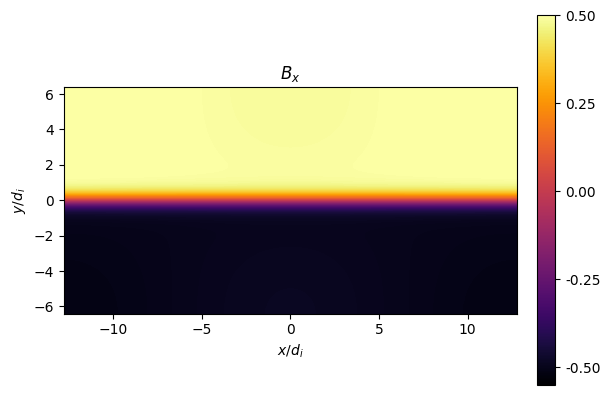

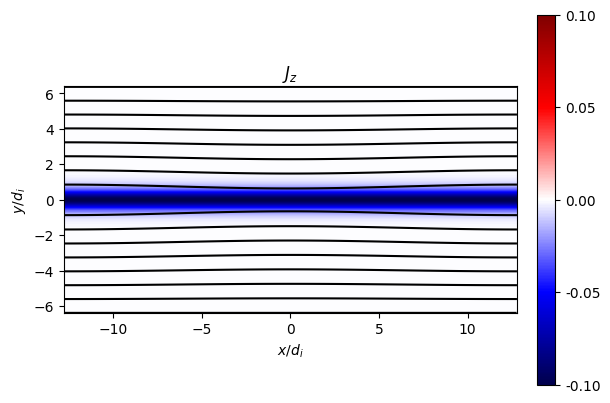

cell finished on test_cpu.


In [10]:
plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, Bx.transpose(), vmax=-0.5, vmin=0.5, cmap='inferno')#, shading='gouraud')
plt.colorbar(format='%.2f', ticks=np.linspace(-0.5, 0.5, 5), fraction=0.046, pad=0.04)
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$B_x$')
plt.setp(plt.gca(), aspect=1.0)

vmax = np.max(np.abs(Jz))
vmin = -vmax
plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, Jz.transpose(), vmax=vmax, vmin=vmin, cmap='seismic')#, shading='gouraud')
plt.colorbar(format='%.2f', ticks=np.linspace(vmin, vmax, 5), fraction=0.046, pad=0.04)
plt.contour(r_coords[0]/di, r_coords[1]/di, psi, 7, colors="k", linestyles="solid")
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$J_z$')
plt.setp(plt.gca(), aspect=1.0)
plt.show()

executing cell on test_cpu...
waiting for cell to finish on test_cpu...


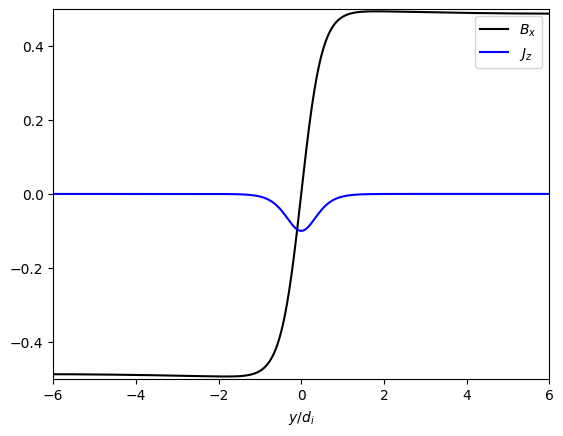

cell finished on test_cpu.


In [11]:
# Plot Bx and Jz at x=0
x0 = int(Nx/2)
plt.figure()
plt.plot(r_coords[1]/di, Bx[x0,...], 'k', label=r'$B_x$')
plt.plot(r_coords[1]/di, Jz[x0,...], 'b', label=r'$J_z$')
plt.xlabel(r'$y/d_i$')
plt.xlim(-6.0, 6.0)
plt.ylim(-0.5, 0.5)
plt.legend(loc='best')
plt.show()

### A look later in time

Let's look at the simulation later in time to see the fully developed reconnection. You can feel free to switch between visualizing the 10 moment and 5 moment data, or even adding your own calls to the read and plot routines to visualize the development in time. 

**We have written out the data every $\Delta t_{IO} = 0.5 \Omega_{ci}^{-1}$ to time $t_{end} = 30 \Omega_{ci}^{-1}$ for a total of 60 frames**.

In [12]:
#data_elc, data_ion, data_field = get_Gdata(f"{data_path}/10m_gem_mass100/rt_10m_gem", 60)
data_elc, data_ion, data_field = get_Gdata(f"{data_path}/resistive_gem_mass100/rt_5m_resistive_gem", 60)
r_coords, r_fluid_elc, r_fluid_ion, r_field = read_data(data_elc, data_ion, data_field)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [13]:
# Compute out-of-plane current density
Nx = r_fluid_ion.shape[0]
Ny = r_fluid_ion.shape[1]
Jz = np.zeros((Nx, Ny))
Jz = charge_ion/mass_ion*r_fluid_ion[...,3] + charge_elc/mass_elc*r_fluid_elc[...,3]
# Compute contours of the magnetic field.
Bx = r_field[...,3]
By = r_field[...,4]
dx = r_coords[0][1] - r_coords[0][0]
dy = r_coords[1][1] - r_coords[1][0]
psi = np.zeros((Ny, Nx))
psi = calc_psi2d(Bx.transpose(),By.transpose(), dx, dy)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


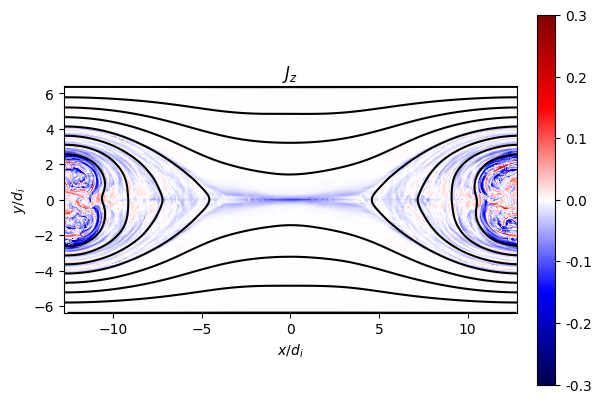

cell finished on test_cpu.


In [14]:
vmax = np.max(np.abs(Jz))
vmin = -vmax
plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, Jz.transpose(), vmax=vmax, vmin=vmin, cmap='seismic')#, shading='gouraud')
plt.colorbar(format='%.1f', ticks=np.linspace(vmin, vmax, 7), fraction=0.046, pad=0.04)
plt.contour(r_coords[0]/di, r_coords[1]/di, psi, 7, colors="k", linestyles="solid")
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$J_z$')
plt.setp(plt.gca(), aspect=1.0)
plt.show()

### Determining the scaling of the in-flows and out-flows: how good is the Sweet-Parker argument?

We now will address the first of our goals today: reconstructing the conservation arguments which Sweet and Parker utilized originally to argue for magnetic reconnection as a possible energy conversion process in observed phenomena such as solar flares. First let us confirm the simulation is behaving as we expect; is the magnetic field vanishing at the X-point? Can we intuitively see that some energy conversion process must be occurring?

In [15]:
# Compute |B|^2 and |B|
_, magB_sq = pg.tools.mag_sq(data_field, '3:6')
magB = np.sqrt(magB_sq[...,0])

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


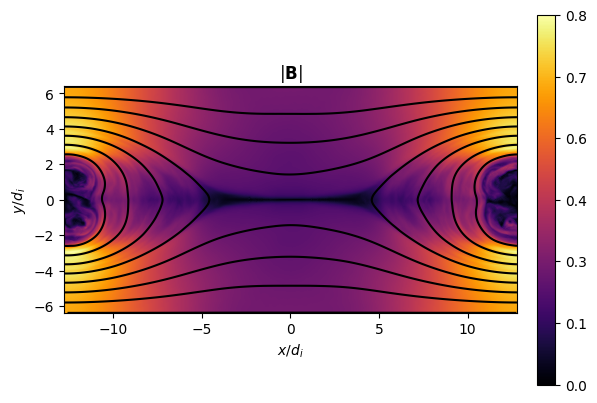

cell finished on test_cpu.


In [16]:
vmax = np.max(magB)
vmin = 0.0
plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, magB.transpose(), vmax=vmax, vmin=vmin, cmap='inferno')#, shading='gouraud')
plt.colorbar(format='%.1f', ticks=np.linspace(vmin, vmax, 7), fraction=0.046, pad=0.04)
plt.contour(r_coords[0]/di, r_coords[1]/di, psi, 7, colors="k", linestyles="solid")
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$|\mathbf{B}|$')
plt.setp(plt.gca(), aspect=1.0)
plt.show()

Since the Alfvén speed is a useful normalization when examining the flows produced by the reconnection, let's visualize the local Alfvén speed now from this local magnetic field magnitude. 

In [17]:
# Compute vA = |B|/sqrt(mu_0 rho_i)
_, rho_ion = pg.tools.get_density(data_ion)
vA = magB/np.sqrt(mu0*rho_ion[...,0])

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


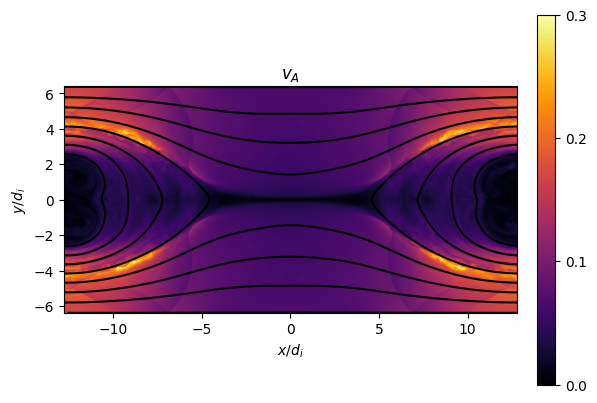

cell finished on test_cpu.


In [18]:
vmax = np.max(vA)
vmin = 0.0
plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, vA.transpose(), vmax=vmax, vmin=vmin, cmap='inferno')#, shading='gouraud')
plt.colorbar(format='%.1f', ticks=np.linspace(vmin, vmax, 4), fraction=0.046, pad=0.04)
plt.contour(r_coords[0]/di, r_coords[1]/di, psi, 7, colors="k", linestyles="solid")
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$v_A$')
plt.setp(plt.gca(), aspect=1.0)
plt.show()

We have a couple different options for normalizing our in-flow and out-flow velocities. Let's visualize both! 

In [19]:
coords, ux =  pg.tools.get_vx(data_ion)
ux_norm0 = ux[...,0]/vA_up # Normalized x flow to upstream Alfven speed
ux_norm = ux[...,0]/vA # Normalized x flow to local Alfven speed

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


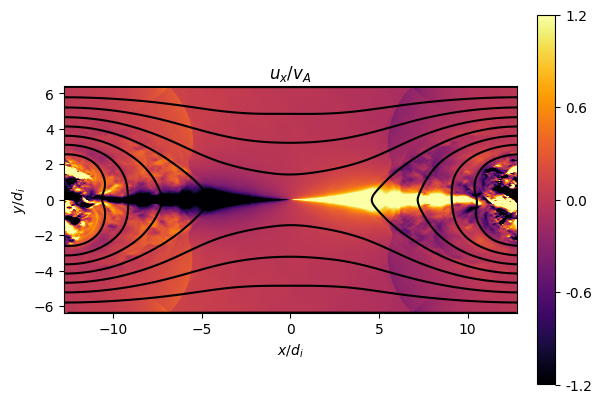

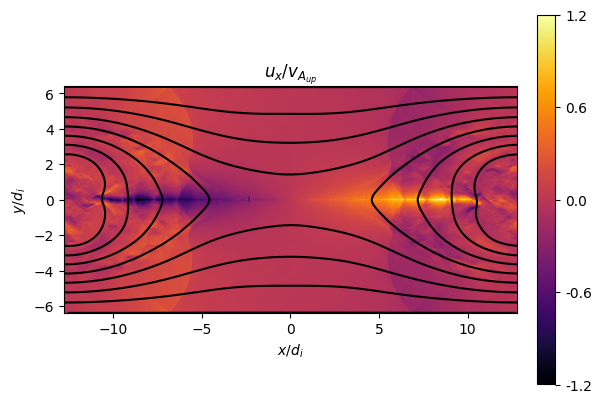

cell finished on test_cpu.


In [20]:
vmax = np.max(np.abs(ux_norm0))
vmin = -vmax
plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, ux_norm.transpose(), vmax=vmax, vmin=vmin, cmap='inferno')#, shading='gouraud')
plt.colorbar(format='%.1f', ticks=np.linspace(vmin, vmax, 5), fraction=0.046, pad=0.04)
plt.contour(r_coords[0]/di, r_coords[1]/di, psi, 7, colors="k", linestyles="solid")
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$u_x/v_A$')
plt.setp(plt.gca(), aspect=1.0)

plt.figure()
# Add shading='gouraud' for further interpolation and smoother plots
plt.pcolormesh(r_coords[0]/di, r_coords[1]/di, ux_norm0.transpose(), vmax=vmax, vmin=vmin, cmap='inferno')#, shading='gouraud')
plt.colorbar(format='%.1f', ticks=np.linspace(vmin, vmax, 5), fraction=0.046, pad=0.04)
plt.contour(r_coords[0]/di, r_coords[1]/di, psi, 7, colors="k", linestyles="solid")
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$y/d_i$')
plt.title(r'$u_x/v_{A_{up}}$')
plt.setp(plt.gca(), aspect=1.0)
plt.show()

And let's also take cuts of these quantities along $y=0$ to see the ion out-flow, $u_x$, along the X-line. We can also plot the out-of-plane current density, $J_z$,  along $y=0$ to estimate the length of the reconnecting current sheet, $L$. Is this what we expect? What should the outflow be based on Sweet and Parker's conservation of energy argument?
1.   $u_x \sim V_{A_{x=y=0}} = \frac{|\mathbf{B}|_{x=y=0}}{\sqrt{\mu_0 \rho_{i_{x=y=0}}}}$
2.   $u_x \sim \frac{|\mathbf{B}|_{x=y=0}}{\sqrt{\mu_0 \rho_{i_{up}}}}$
3.   $u_x \sim V_{A_{up}} = \frac{B_0}{\sqrt{\mu_0 \rho_{i_{up}}}}$
4.   $u_x \sim \frac{B_0}{\sqrt{\mu_0 \rho_{i_{x=y=0}}}}$

Similarly, let's examine the in-flow velocity, $u_y$, and out-of-plane current density, $J_z$, at $x=0$ to determine the width, $\delta$, of the current sheet. Is this also what we expect? What should the inflow be base on Sweet and Parker's conservation of mass argument? 
1.   $u_y \sim \frac{L}{\delta} u_x$
2.   $u_y \sim \frac{\delta}{L} u_x$
3.   $u_y \sim \delta u_x $
4.   $u_y \sim L u_x$

[Answer Form 4](https://docs.google.com/forms/d/e/1FAIpQLScSG_2YGwhf5hvFoluxxzPsxN13FXdHqlw0n5axdwx-xg9GQg/viewform?usp=dialog)

executing cell on test_cpu...
waiting for cell to finish on test_cpu...


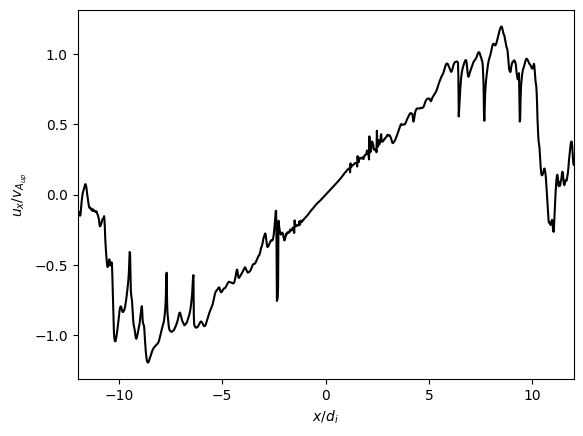

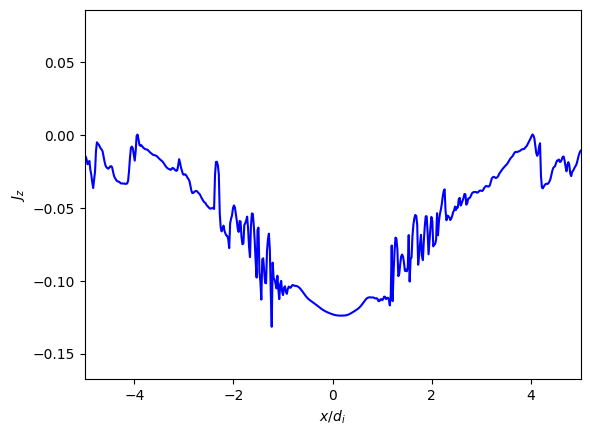

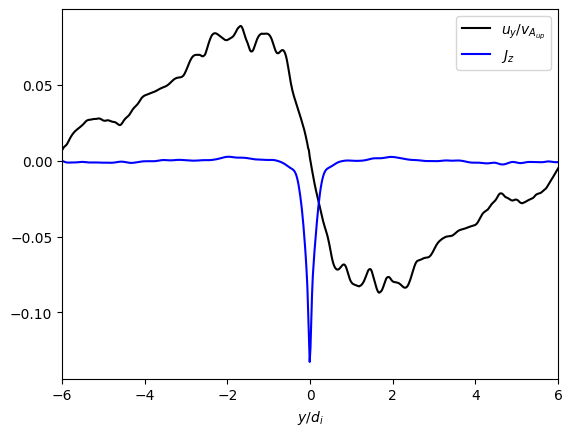

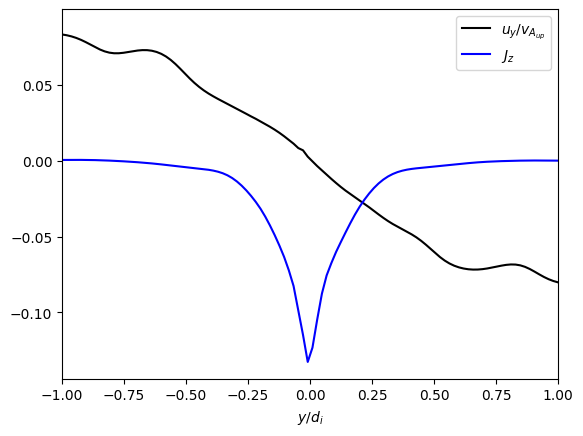

cell finished on test_cpu.


In [21]:
# Take a cut of ux/vA_up at y=0
ux_norm0_y0 = ux_norm0[..., int(Ny/2)]
Jz_y0 = Jz[..., int(Ny/2)]
plt.figure()
plt.plot(r_coords[0]/di, ux_norm0_y0, 'k')
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$u_x/v_{A_{up}}$')
plt.xlim(-12,12)

# Plot Jz extent at y=0 to see length of current sheet
plt.figure()
plt.plot(r_coords[0]/di, Jz_y0, 'b')
plt.xlabel(r'$x/d_i$')
plt.ylabel(r'$J_z$')
plt.xlim(-5,5)

# Fetch uy and Jz and take a cut through x = 0 to see width of current sheet
coords, uy = pg.tools.get_vy(data_ion)
uy_x0 = uy[int(Nx/2), ..., 0]/vA_up
Jz_x0 = Jz[int(Nx/2), ...]
plt.figure()
plt.plot(r_coords[1]/di, uy_x0, 'k', label=r'$u_y/v_{A_{up}}$')
plt.plot(r_coords[1]/di, Jz_x0, 'b', label=r'$J_z$')
plt.xlabel(r'$y/d_i$')
plt.xlim(-6,6)
plt.legend(loc='best')

plt.figure()
plt.plot(r_coords[1]/di, uy_x0, 'k', label=r'$u_y/v_{A_{up}}$')
plt.plot(r_coords[1]/di, Jz_x0, 'b', label=r'$J_z$')
plt.xlabel(r'$y/d_i$')
plt.xlim(-1,1)
plt.legend(loc='best')
plt.show()

### So what does it even mean for the reconnection to be fast?

We have now shown that our simulations obey the Sweet-Parker scalings. Good! \texttt{Gkeyll} obeys conservation of mass and energy! But wait a minute, when we derived the Sweet-Parker scaling before we found the reconnection rate before, it scaled with the resistivity, meaning the in-flow velocity should be related to the Alfvén velocity by the resistivity. We know that, 
\begin{align}
u_y \sim u_x S^{-\frac{1}{2}}, \quad S = \frac{L V_A}{\eta}
\end{align}
Let's estimate this from our resistive 5 moment calculation. Given the choice of plasma parameter, $\Lambda$, and $L \sim 10 d_i$, we should get a Lundquist number of $\sim 10^5$ (try plugging in all the values for the code units; since the Lundquist number is a normalized quantity you can just use the code unit values for everything, $L, V_A, \eta$, and safely estimate the Lundquist number). 

Well.. that is much slower than we are finding right? So what is the actual reconnection rate? We can compute this by either evaluating the reconnecting electric field $E_z$ at the X-point, or computing the rate of change of the vector potential. Either way, we see that in fact the rate is actually $\sim 0.1 V_A$, **much faster** than what Sweet and Parker estimated! In fact, this rate is the same rate fully kinetic simulations which directly solve the Vlasov equation obtain! 

executing cell on test_cpu...
waiting for cell to finish on test_cpu...


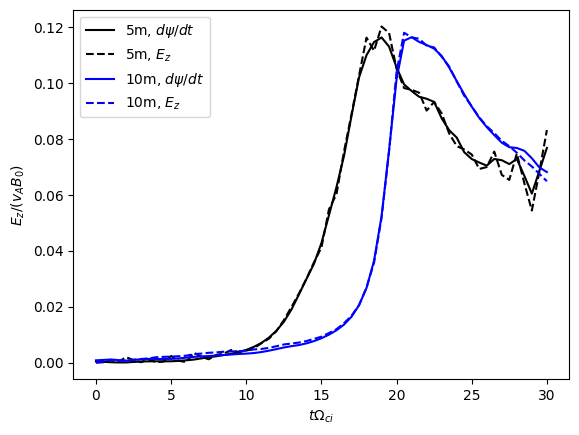

cell finished on test_cpu.


In [22]:
# Compute the reconnection rate. Please note this may take several minutes (5 - 7 minutes).
def compute_flux(pre, frame): 
    data_elc, data_ion, data_field = get_Gdata(pre, frame)
    r_coords, r_fluid_elc, r_fluid_ion, r_field = read_data(data_elc, data_ion, data_field)
    # Fetch Ez at X point
    EzX = r_field[int(Nx/2), int(Ny/2), 2]
    # Compute vector potential at X point.
    dx = r_coords[0][1] - r_coords[0][0]
    dy = r_coords[1][1] - r_coords[1][0]
    psi = np.zeros((Ny, Nx))
    psi = calc_psi2d(r_field[...,3].transpose(), r_field[...,4].transpose(), dx, dy)
    psiX = psi[int(Ny/2), int(Nx/2)]
    psi0 = np.max(np.abs(psi))        
    return psiX, psi0, EzX
    
num_frames = 61
psiX_5m = np.zeros(num_frames)
psi0_5m = np.zeros(num_frames)
EzX_5m = np.zeros(num_frames)
psiX_10m = np.zeros(num_frames)
psi0_10m = np.zeros(num_frames)
EzX_10m = np.zeros(num_frames)
t = np.linspace(0, 30/omega_ci, num_frames)
rate_fac = 1/(B0*vA_up)
for i in range(0, num_frames):
    # Compute the flux at the X-point in resistive 5 moment simulation
    psiX_5m[i], psi0_5m[i], EzX_5m[i] = compute_flux(f"{data_path}/resistive_gem_mass100/rt_5m_resistive_gem", i) 
    # Compute the flux at the X-point in 10 moment simulation
    psiX_10m[i], psi0_10m[i], EzX_10m[i] = compute_flux(f"{data_path}/10m_gem_mass100/rt_10m_gem", i) 

# We can either use Ez or the time derivative of the vector potential psi to estimate the reconnection rate. 
psi_diff_5m = np.abs(psi0_5m - psiX_5m)
dpsi_dt_5m = np.gradient(psi_diff_5m, t)
psi_diff_10m = np.abs(psi0_10m - psiX_10m)
dpsi_dt_10m = np.gradient(psi_diff_10m, t)
plt.figure()
plt.plot(t*omega_ci, np.abs(dpsi_dt_5m)*rate_fac, 'k-', label=r'5m, $d\psi/dt$')
plt.plot(t*omega_ci, np.abs(EzX_5m)*rate_fac, 'k--', label=r'5m, $E_z$')
plt.plot(t*omega_ci, np.abs(dpsi_dt_10m)*rate_fac, 'b-', label=r'10m, $d\psi/dt$')
plt.plot(t*omega_ci, np.abs(EzX_10m)*rate_fac, 'b--', label=r'10m, $E_z$')
plt.xlabel(r'$t \Omega_{ci}$')
plt.ylabel(r'$E_z/(v_A B_0)$')
plt.legend(loc='best')
plt.show()

### Explaining "fast" reconnection with the Ohm's Law

Let's now look at why the reconnection is faster in our multi-fluid simulations by answering the following question: what is different about our simulation compared to the Sweet-Parker argument? 
1.   MHD cannot get fast reconnection. We had to add at least two-fluid effects to include dispersive waves. 
2.   Sweet-Parker assumed resistivity set the $\delta/L$ scaling; that's not true in our simulations. The layer width is bigger than if we only had resistivity. 
3.   The layer is not genuinely incompressible. We need compressibility so that the plasma can shock and push plasma in the outflow. 
4.   The conservation of energy argument is missing additional energy flux terms which move energy into the layer.

[Answer Form 5](https://docs.google.com/forms/d/e/1FAIpQLSc0le8Mn-4KTOqTZynZ9ztUfLtH7IhxW3mGi1x4SwURYmaWCQ/viewform?usp=dialog)

Given this (key) difference between the Sweet-Parker argument and our simulations, let's look at the effective Ohm's Law for our plasma. Unlike in MHD, where the Ohm's Law prescribes the electric field,
\begin{align}
\mathbf{E}_{MHD} = \mathbf{u} \times \mathbf{B} + \eta \mathbf{J}
\end{align}
we solved Maxwell's equations coupled to our multi-fluid system. Nevertheless, we can still utilize the electron momentum equation to obtain an Ohm's Law-like expression for the electric field:
\begin{align}
\mathbf{E} = \frac{m_e}{q_e \rho_e} \left (\frac{\partial \rho_e \mathbf{u}_e}{\partial t} + \nabla \cdot \left ( \rho_e \mathbf{u}_e \mathbf{u}_e + \mathbf{P}_e \right ) -\frac{q_e}{m_e} \rho_e \mathbf{u}_e \times \mathbf{B} - \mathbf{R} \right )
\end{align}
which is often simplified using conservation of mass as 
\begin{align}
\mathbf{E} = \frac{m_e}{q_e} \left (\frac{\partial \mathbf{u}_e}{\partial t} + \mathbf{u}_e \cdot \nabla  \mathbf{u}_e + \frac{1}{\rho_e} \nabla \cdot \mathbf{P}_e \right ) -\mathbf{u}_e \times \mathbf{B} - \frac{m_e}{q_e \rho_e} \mathbf{R}. 
\end{align}

In the two-dimensional geometry of this magnetic reconnection setup, the important electric field for supporting the reconnection is $E_z$. So our Ohm's Law in general is
\begin{align}
E_z = \frac{m_e}{q_e} \left (\underbrace{\frac{\partial u_{z_e}}{\partial t} + u_{x_e} \frac{\partial u_{z_e}}{\partial x} + u_{y_e} \frac{\partial u_{z_e}}{\partial y}}_{Inertia} + \frac{1}{\rho_e} \left [\frac{\partial P_{xz_e}}{\partial x} + \frac{\partial P_{yz_e}}{\partial y} \right ] \right ) - \underbrace{\left (u_{x_e} B_y - u_{y_e} B_x \right )}_{Hall} - \underbrace{\frac{m_e}{q_e \rho_e} R_z}_{Resistivity}. 
\end{align}
with the off-diagonal pressure tensor components vanishing for the 5 moment simulations, and no resistive contribution to the 10 moment simulations. 

Which of these terms can break field-lines? 
1.   Only resistivity. 
2.   Resistivity, inertia, and Hall term can break field lines (all the terms in 5 moment). 
3.   Resistivity and the off-diagonal Pressure Tensor components. 
4.   All of the terms can break field lines.

[Answer Form 6](https://docs.google.com/forms/d/e/1FAIpQLSfYwfxJJ8rMISttTfOlVlJEtzt4wIHQ4Z9QZHpHw_yA2FGR7A/viewform?usp=dialog)

In [23]:
def fdx_2d_8th_order(data, dx, Nx, Ny):
    diff_data = np.zeros((Nx, Ny))
    for i in range(4, Nx-4):
        for j in range(4, Ny-4):    
            diff_data[i,j] = (-data[i+4, j]/280.0 + data[i+3, j]*4.0/105.0 - data[i+2, j]/5.0 + data[i+1, j]*4.0/5.0 \
                - data[i-1, j]*4.0/5.0 + data[i-2, j]/5.0 - data[i-3, j]*4.0/105.0 + data[i-4, j]/280.0) / dx
    return diff_data

def fdy_2d_8th_order(data, dy, Nx, Ny):
    diff_data = np.zeros((Nx, Ny))
    for i in range(4, Nx-4):
        for j in range(4, Ny-4):    
            diff_data[i,j] = (-data[i, j+4]/280.0 + data[i, j+3]*4.0/105.0 - data[i, j+2]/5.0 + data[i, j+1]*4.0/5.0 \
                - data[i, j-1]*4.0/5.0 + data[i, j-2]/5.0 - data[i, j-3]*4.0/105.0 + data[i, j-4]/280.0) / dy
    return diff_data    

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [24]:
def ohm_10m(frame):
    data_elc, data_ion, data_field = get_Gdata(f"{data_path}/10m_gem_mass100/rt_10m_gem", frame)
    r_coords, r_fluid_elc, r_fluid_ion, r_field = read_data(data_elc, data_ion, data_field)
    Nx = r_fluid_ion.shape[0]
    Ny = r_fluid_ion.shape[1]    
    dx = r_coords[0][1] - r_coords[0][0]
    dy = r_coords[1][1] - r_coords[1][0]
    # Fetch mass density, in-plane momentum, out-of-plane velocity, and pressure tensor Pij
    rho_elc = r_fluid_elc[...,0]
    rhoux_elc = r_fluid_elc[..., 1]
    rhouy_elc = r_fluid_elc[..., 2]
    _, uz_elc = pg.tools.get_vz(data_elc)
    uz_elc = np.squeeze(uz_elc)
    _, Pij_elc = pg.tools.get_pij(data_elc)
    Pxz_elc = Pij_elc[...,2]
    Pyz_elc = Pij_elc[...,4]
    
    # Compute 1/(q/m rho) div(P_iz) and 1/(q/m rho) (rhou_x du_z/dx + rhou_y du_z/dy)
    divRxz_elc = fdx_2d_8th_order(uz_elc, dx, Nx, Ny)
    divRyz_elc = fdy_2d_8th_order(uz_elc, dy, Nx, Ny)
    divPxz_elc = fdx_2d_8th_order(Pxz_elc, dx, Nx, Ny)
    divPyz_elc = fdy_2d_8th_order(Pyz_elc, dy, Nx, Ny)    

    divRxz_elc = rhoux_elc*divRxz_elc/(charge_elc/mass_elc*rho_elc)
    divRyz_elc = rhouy_elc*divRyz_elc/(charge_elc/mass_elc*rho_elc) 
    divPxz_elc = divPxz_elc/(charge_elc/mass_elc*rho_elc)
    divPyz_elc = divPyz_elc/(charge_elc/mass_elc*rho_elc) 

    # Compute Hall term
    Bx = r_field[...,3]
    By = r_field[...,4]
    hallz = np.zeros((Nx, Ny))
    hallz = charge_elc/mass_elc*(rhoux_elc*By - rhouy_elc*Bx)/(charge_elc/mass_elc*rho_elc)

    # Fetch Ez
    Ez = r_field[...,2]

    return r_coords, Ez, hallz, divPxz_elc, divPyz_elc, divRxz_elc, divRyz_elc

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


In [25]:
def ohm_5m(frame):
    data_elc, data_ion, data_field = get_Gdata(f"{data_path}/resistive_gem_mass100/rt_5m_resistive_gem", frame)
    r_coords, r_fluid_elc, r_fluid_ion, r_field = read_data(data_elc, data_ion, data_field)
    Nx = r_fluid_ion.shape[0]
    Ny = r_fluid_ion.shape[1]    
    dx = r_coords[0][1] - r_coords[0][0]
    dy = r_coords[1][1] - r_coords[1][0]
    # Compute Hall term
    rho_elc = r_fluid_elc[...,0]
    rho_ion = r_fluid_ion[...,0]
    rhoux_elc = r_fluid_elc[..., 1]
    rhouy_elc = r_fluid_elc[..., 2]
    Bx = r_field[...,3]
    By = r_field[...,4]
    hallz = np.zeros((Nx, Ny))
    hallz = charge_elc/mass_elc*(rhoux_elc*By - rhouy_elc*Bx)/(charge_elc/mass_elc*rho_elc)

    # Fetch Ez
    Ez = r_field[...,2]

    # Compute resistivity
    _, uz_elc = pg.tools.get_vz(data_elc)
    _, uz_ion = pg.tools.get_vz(data_ion)
    _, T_elc = pg.tools.get_temp(data_elc, gas_gamma)
    uz_elc = np.squeeze(uz_elc)
    uz_ion = np.squeeze(uz_ion)
    T_elc_norm = np.squeeze(T_elc/T_elc_ref)
    tau_ei = Lambda_ee/np.log(Lambda_ee)*6.0*np.sqrt(2.0*np.pi**3*T_elc_norm**3*mass_elc*mass_ion**2)/rho_ion
    eta_z =  (-rho_elc/tau_ei*(uz_elc - uz_ion))/(charge_elc/mass_elc*rho_elc)

    # Compute 1/(q/m rho) (rhou_x du_z/dx + rhou_y du_z/dy)
    divRxz_elc = fdx_2d_8th_order(uz_elc, dx, Nx, Ny)
    divRyz_elc = fdy_2d_8th_order(uz_elc, dy, Nx, Ny)

    divRxz_elc = rhoux_elc*divRxz_elc/(charge_elc/mass_elc*rho_elc)
    divRyz_elc = rhouy_elc*divRyz_elc/(charge_elc/mass_elc*rho_elc) 
    
    return r_coords, Ez, hallz, eta_z, divRxz_elc, divRyz_elc

executing cell on test_cpu...
waiting for cell to finish on test_cpu...
cell finished on test_cpu.


executing cell on test_cpu...
waiting for cell to finish on test_cpu...


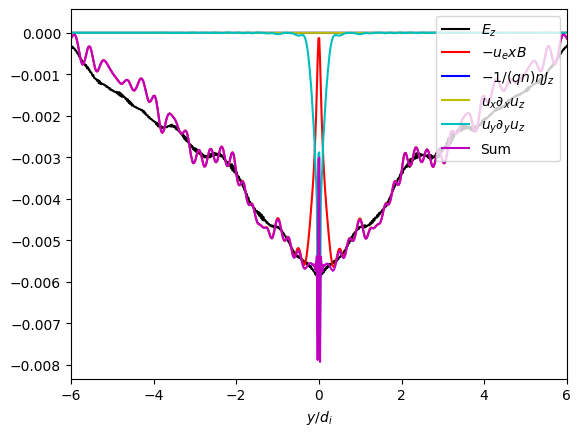

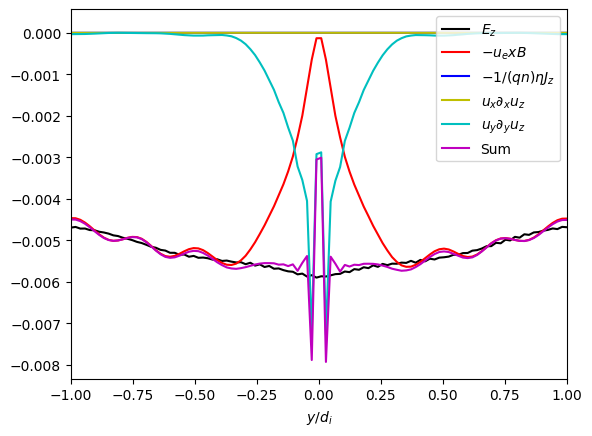

cell finished on test_cpu.


In [26]:
# Choose time = 20 Omega_{ci}^{-1} near the peak of the reconnection (frame 40)
coords, Ez, hallz, eta_z, divRxz_elc, divRyz_elc = ohm_5m(40)
sum_ohm = -hallz - eta_z + divRxz_elc + divRyz_elc

x_point = int(Nx/2)
plt.figure()
plt.plot(coords[1]/di, Ez[x_point, :], 'k', label=r'$E_z$')
plt.plot(coords[1]/di, -hallz[x_point, :], 'r', label=r'$-u_e x B$')
plt.plot(coords[1]/di, -eta_z[x_point, :], 'b', label=r'$-1/(qn) \eta J_z$')
plt.plot(coords[1]/di, divRxz_elc[x_point, :], 'y', label=r'$u_x \partial_x u_z$')
plt.plot(coords[1]/di, divRyz_elc[x_point, :], 'c', label=r'$u_y \partial_y u_z$')
plt.plot(coords[1]/di, sum_ohm[x_point, :], 'm', label=r'Sum')
plt.xlabel(r'$y/d_i$')
plt.legend(loc='upper right')
plt.xlim(-6.0, 6.0)

plt.figure()
plt.plot(coords[1]/di, Ez[x_point, :], 'k', label=r'$E_z$')
plt.plot(coords[1]/di, -hallz[x_point, :], 'r', label=r'$-u_e x B$')
plt.plot(coords[1]/di, -eta_z[x_point, :], 'b', label=r'$-1/(qn) \eta J_z$')
plt.plot(coords[1]/di, divRxz_elc[x_point, :], 'y', label=r'$u_x \partial_x u_z$')
plt.plot(coords[1]/di, divRyz_elc[x_point, :], 'c', label=r'$u_y \partial_y u_z$')
plt.plot(coords[1]/di, sum_ohm[x_point, :], 'm', label=r'Sum')
plt.xlabel(r'$y/d_i$')
plt.legend(loc='upper right')
plt.xlim(-1.0, 1.0)
plt.show()

executing cell on test_cpu...
waiting for cell to finish on test_cpu...


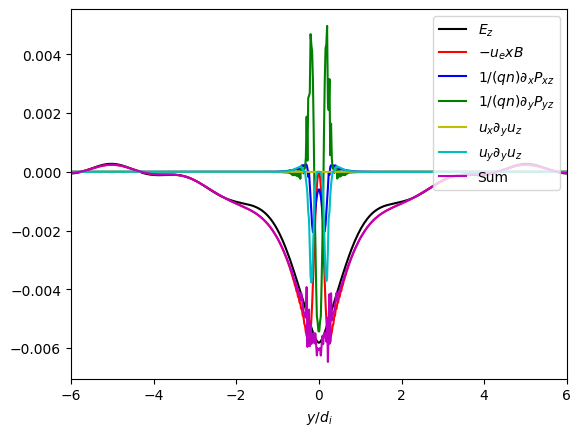

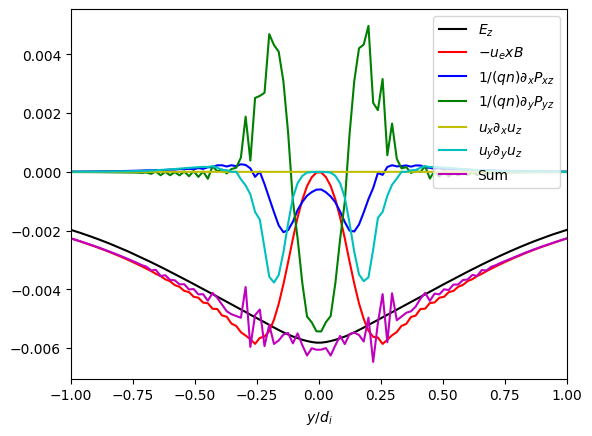

cell finished on test_cpu.


In [27]:
# Choose time = 20 Omega_{ci}^{-1} near the peak of the reconnection (frame 40)
coords, Ez, hallz, divPxz_elc, divPyz_elc, divRxz_elc, divRyz_elc = ohm_10m(40)
sum_ohm = -hallz + divPxz_elc + divPyz_elc + divRxz_elc + divRyz_elc

x_point = int(Nx/2)
plt.figure()
plt.plot(coords[1]/di, Ez[x_point, :], 'k', label=r'$E_z$')
plt.plot(coords[1]/di, -hallz[x_point, :], 'r', label=r'$-u_e x B$')
plt.plot(coords[1]/di, divPxz_elc[x_point, :], 'b', label=r'$1/(qn) \partial_x P_{xz}$')
plt.plot(coords[1]/di, divPyz_elc[x_point, :], 'g', label=r'$1/(qn) \partial_y P_{yz}$')
plt.plot(coords[1]/di, divRxz_elc[x_point, :], 'y', label=r'$u_x \partial_y u_z$')
plt.plot(coords[1]/di, divRyz_elc[x_point, :], 'c', label=r'$u_y \partial_y u_z$')
plt.plot(coords[1]/di, sum_ohm[x_point, :], 'm', label=r'Sum')
plt.xlabel(r'$y/d_i$')
plt.legend(loc='upper right')
plt.xlim(-6.0, 6.0)

plt.figure()
plt.plot(coords[1]/di, Ez[x_point, :], 'k', label=r'$E_z$')
plt.plot(coords[1]/di, -hallz[x_point, :], 'r', label=r'$-u_e x B$')
plt.plot(coords[1]/di, divPxz_elc[x_point, :], 'b', label=r'$1/(qn) \partial_x P_{xz}$')
plt.plot(coords[1]/di, divPyz_elc[x_point, :], 'g', label=r'$1/(qn) \partial_y P_{yz}$')
plt.plot(coords[1]/di, divRxz_elc[x_point, :], 'y', label=r'$u_x \partial_x u_z$')
plt.plot(coords[1]/di, divRyz_elc[x_point, :], 'c', label=r'$u_y \partial_y u_z$')
plt.plot(coords[1]/di, sum_ohm[x_point, :], 'm', label=r'Sum')
plt.xlabel(r'$y/d_i$')
plt.legend(loc='upper right')
plt.xlim(-1.0, 1.0)
plt.show()

In [28]:
%stop_runtime test_cpu
%switch_runtime local

Terminated runtime=test_cpu. state={'experimentId': 'CS_Agent_40692a43-bbb1-4a4b-89d4-5f3fe6cb9467', 'terminated': True}
Switched to runtime=local.
